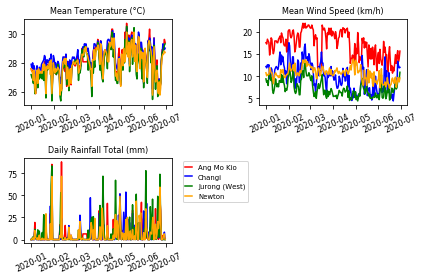

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import glob, os, datetime

def station_mapping(row): 
    mapping = { 
        "Changi": 24, 
        "Jurong (West)": 44, 
        "Ang Mo Kio": 109, 
        "Newton": 111
    } 
    return mapping.get(row['Station'])

area_color = { 
        "amk": 'red', 
        "changi": 'blue', 
        "jurong": 'green',      
        "newton": 'orange'
    }      

all_files = glob.glob(os.path.join("data", "*.csv"))
df = pd.concat((pd.read_csv(f, engine='python',  skiprows=1, header=None) for f in all_files))
df = df.reset_index(drop = True)
df.columns = ['Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)',	'Highest 60 Min Rainfall (mm)',	'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)', 'Maximum Temperature (°C)', 'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']
for col in df.columns[4:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.fillna(df.mean(), inplace=True)   
df['Date'] = pd.to_datetime(df.apply(lambda x: datetime.date(x['Year'], x['Month'], x['Day']), axis=1))
df['Station No'] = df.apply(lambda row: station_mapping(row), axis=1)
df = df.set_index('Date')
required_col = ['Mean Temperature (°C)', 'Mean Wind Speed (km/h)', 'Daily Rainfall Total (mm)']
areas = ['Ang Mo Kio', 'Changi', 'Jurong (West)', 'Newton']
df_amk = df.loc[df['Station'] == areas[0], required_col]
df_changi = df.loc[df['Station'] == areas[1], required_col]
df_jurong = df.loc[df['Station'] == areas[2], required_col]
df_newton = df.loc[df['Station'] == areas[3], required_col]

fsize = 8
rotate = 25

for i in range(3):
    plt.subplot(2,2,i+1)
    plt.plot(df_amk[required_col[i]], color=area_color['amk'], label=areas[0])
    plt.plot(df_changi[required_col[i]], color=area_color['changi'], label=areas[1])
    plt.plot(df_jurong[required_col[i]], color=area_color['jurong'], label=areas[2])
    plt.plot(df_newton[required_col[i]], color=area_color['newton'], label=areas[3])
    plt.title(required_col[i],fontsize=fsize)
    plt.xticks(rotation=rotate,fontsize=fsize)
    plt.yticks(fontsize=fsize)

plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1.0), loc='left',handlelength=1)
plt.tight_layout()
plt.show()
